# Projet numérique de probabilités 

## Préambule

Dans ce projet, on va chercher à développer un algorithme permettant de générer des textures aléatoires reprenant certaines caractéristiques du mouvement brownien.
Dans un premier temps, on va s'intéresser à construire le mouvement brownien en une dimension comme limite d'une marche aléatoire. On verra ensuite une construction alternative qui permettra de conserver certaines de ses propriétés puis on la généralisera à 2 dimensions.


In [1]:
pip install latex

Note: you may need to restart the kernel to use updated packages.
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7605 sha256=bc362b952dc8201f5ce68b3d6d9aaaf5304a5a0842985864176f877d3f773a82
  Stored in directory: c:\users\computer\appdata\local\pip\cache\wheels\94\84\e5\5ce582523fd479d00356867953085a67c47fbbc86506aa92f8
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7246 sha256=3ba6b000bfacdb3c6e967f4958090e406d250293fea87305de8d01a3768988fe
  Stored in directory: c:\users\computer\appdata\local\pip\cache\wheels\8a\0b\a3\37ca07d5a2838bba2e475e8090455e40b94631bd57a99a35f4
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2782 sha256=bac21f4fb8c060009e73e4df4139e35c96c23506f734105c8dad727fb0dd7128
  Stored in directory: c:\users\computer\appdata\local\pip\cache\wheels\84\c7\f5\fed66dce1ed897b44e0da776b6a592dfad0a70f7dd61f73a9d
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.whl size=2213 sha256=d64

# Marche aléatoire

Soit $(X_i)_{i\in \mathbb{N}^\ast}$ une suite de variables aléatoires indépendantes telle que :

$$\mathbb{P}(X_i=x) = \left\{\begin{array}{ll}
\frac{1}{2} & \text{ si } x=1\\
\frac{1}{2} & \text{ si } x=-1\\
\end{array}\right.
\forall i\geq 1$$

On considère la suite $(Y_n)_{n \in \mathbb{N}}$, où $Y_0 = 0$ et 
$$Y_n=\sum_{i=1}^{n}X_i$$


1. Calculer l'espérance et la variance de $X_i$.
2. En déduire l'espérance et la variance de $Y_n$.
3. Montrer que $\forall n \in \mathbb{N}$, $\mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}}$. On dit que la suite $(Y_n)_{n \in \mathbb{N}}$ possède la propriété de Markov.
4. Montrer que $\mathrm{Cov}(Y_n,Y_{n'}) = \min(n,n')$ puis que $\frac12\mathbb{E}\left((Y_n-Y_{n+h})^2\right) = h/2$, pour $h>0$. Cette dernière quantité s'appelle le variogramme de $Y_n$ et peut s'interpréter comme une quantification de sa régularité.
5. Utiliser le théorème central limite pour montrer que
  $$\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$


In [2]:
# chargement de dépendances
%pylab inline
import scipy.stats as sps

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Initialisation de la graine
np.random.seed(1234)


# Comportement asymptotique

On introduit maintenant $t_i=\frac{i}{n}, i=0,\ldots,n$ et
$$Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}, t\in[0,1],$$
où $[\cdot]$ est la partie entière.

1. Montrer que $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}]$ forme une partition de $(0,1]$.

2. Montrer que $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

3. Par conséquent, $Z^{(n)}_t, t\in[0,1]$ est bien défini $\forall t \in [0,1]$. Implémenter un algorithme pour simuler $Z^{(n)}_t$ aux points $t_i,~ i \in\{0,\ldots,n\}$. Représenter une trajectoire pour $n$=1000.



### Question 3
Pour simuler les $Z_{t_i}^{(n)}$, nous allons utiliser la formule:

$$Z_{t_i}^{(n)} = \frac{Y_i}{\sqrt{n}}$$

Pour simuler les $X_i$, on part d'une variable uniforme sur $ ]0,1[ $ générée par Numpy à laquelle on applique la fonction réciproque généralisée de la fonction de répartition $F_x$: ie: 


$$
   \forall y \in ]0,1[, F^-(y) = -1 \;si\;0<y\le1/2 \\
                        F^-(y)  = 1 \;si\; 1/2<y<1
$$


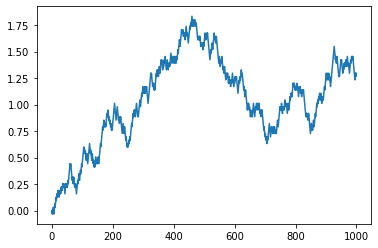

In [4]:
#question 3

#simulation des Yi
n = 1000
U = np.random.uniform(size = n)
def f(u): 
    if u<0.5: return -1
    if 0.5 < u and u<1: return 1

f = np.vectorize(f)
X = f(U) #matrice des Xi pour i entre 0 et 999
Y = np.array([sum(X[:i]) for i in range(len(X))]) #matrice des Yi pour i entre 0 et 999

#simulation des Z
Z = Y / np.sqrt(1000)

plt.plot(Z)


4. Montrer que $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t),~\forall t \in [0,1]$, en déduire la loi de $Z^{(n)}_1=\frac{Y_n}{\sqrt{n}}$ quand $n$
  tend vers l'infini.
  Construire un échantillon de taille 1000 de valeurs de $Z^{(n)}_1$ pour n = 1000. Représenter son histogramme et le comparer avec la densité gaussienne standard.



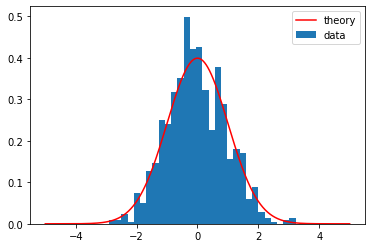

In [5]:
#construction de l'échantillon de 1000 valeurs de Z1^(n) pour n = 1000
Z = [] #pour stocker ces valeurs
#simulation des Xi
def f(u): 
    if u<=0.5: return -1
    if 0.5 < u and u<1: return 1
f = np.vectorize(f)


for i in range(1000):
    n = 1000
    U = np.random.uniform(size = n)
    X = f(np.random.uniform(size = n)) #matrice des Xi pour i entre 0 et 999
    Z1 = sum(X) / np.sqrt(n)
    Z.append(Z1)
Z = np.array(Z)
plt.hist(Z, bins = 30 , density = True, label = "data")
from scipy.stats import norm
x = np.linspace(-5,5,1000)
gaussian = norm.pdf(x)
plt.plot(x, gaussian , "r", label = "theory")
plt.legend()

**Remarque**

${\bf Z}_t=\lim_{n \to \infty} Z^{(n)}_t$ est le mouvement brownien standard sur $[0,1]$. 


# Une construction alternative

On considère maintenant la construction suivante, définie pour tout $t \in [0,1]$:
$$\tilde{Z}^{(n)}_t = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))$$
où les $X_i$ sont définis tels que précédemment et les $U_i$ sont des variables aléatoires i.i.d. de loi uniforme sur $[0,1]$.
Cette construction permet de définir un algorithme alternatif de simulation d'une (approximation de) trajectoire brownienne, cette fois-ci non standard au sens où on n'a pas systématiquement $\tilde{Z}^{(n)}_0 = 0$.

1. Discrétiser l'intervalle $[0,1]$ en 1000 points de manière régulière et implémenter l'algorithme (commencer par n = 1). Représenter une trajectoire pour $n = 1000$.

### Question 1 - Réponse:
On crée un vecteur $Z$ où l'on va stocker $\tilde{Z_{t_0}}^{(n)}, \tilde{Z_{t_1}}^{(n)},\tilde{Z_{t_2}}^{(n)}, ..., \tilde{Z_{t_n}}^{(n)}$

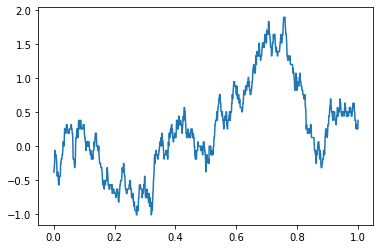

In [6]:
Z = []
n = 1000

T = []
X = f(np.random.uniform(size = n))
U = np.random.uniform(size = n) 



def g(t):
    G = U>=t #matrice de True et de False
    G = G.astype(int) #matrice de 1 et de 0
    G[G==0] = -1 #matrice de 1 et de -1
    return G
    
for j in range(0,n+1):
    t = j/n
    T.append(t)
    #calcul de Z_tj, noté Zj dans le code
    G = g(t)
    Zj = sum(G*X)/np.sqrt(n)
    Z.append(Zj)
    
Z = np.array(Z)
plt.plot(T, Z)
    

2. Calculer l'espérance et la variance de $\tilde{Z}^{(n)}_t$. En déduire que $\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$. Le vérifier expérimentalement aux points $\{0,0.25,0.5,0.75,1\}$ sur la base d'un échantillon de 1000 réalisations de $\tilde{Z}^{(n)}$.

Pour i $\in$ [0,1000], les variables aléatoires $X_i(\mathbb{1}_{]0,U_i]}(t) - \mathbb{1}_{]U_i,1]}(t))$ sont indépendantes, identiquement distribuées.

D'après le TCL $\frac{\tilde{Z}^{(n)}_t}{\sqrt{n}}$ admet le comportement asymptotique suivant:

$$\frac{ \frac{\tilde{Z}^{(n)}_t}{\sqrt{n}} - \mathbb{E}\left(\frac{\tilde{Z}^{(n)}_t}{\sqrt{n}}\right) } {\mathbb{V}\left(\frac{\tilde{Z}^{(n)}_t}{\sqrt{n}}\right)} \xrightarrow[n \to \infty]{\mathcal{L}} \mathcal{N}\left(\mathbb{E}\left(\frac{\tilde{Z}^{(n)}_t}{\sqrt{n}}\right),\mathbb{V}\left(\frac{\tilde{Z}^{(n)}_t}{\sqrt{n}}\right)\right)$$
### calcul de l'espérance

Par indépendance des variables aléatoires dans la somme,
$ \mathbb{E}\left(\frac{\tilde{Z}^{(n)}_t}{\sqrt{n}}\right) = \frac{1}{\sqrt{n} }\sum_{i=1}^{n} \mathbb{E}(X_i(\mathbb{1}_{]0,U_i]}(t) - \mathbb{1}_{]U_i,1]}(t))) $

Puis comme $\mathbb{E}(X_i) = 0 $, on a: 
$\mathbb{E}(X_i(\mathbb{1}_{]0,U_i]}(t) - \mathbb{1}_{]U_i,1]}(t))) = 0$

Ensuite, $ \mathbb{E}\left(\frac{\tilde{Z}^{(n)}_t}{\sqrt{n}}\right) = 0$


### calcul de la variance


$\mathbb{V}\left(\tilde{Z}^{(n)}_t\right) = \frac{1}{n} \sum_{i=1}^{n} \mathbb{V}(X_i(\mathbb{1}_{]0,U_i]}(t) - \mathbb{1}_{]U_i,1]}(t))) $

$\mathbb{V}\left(\tilde{Z}^{(n)}_t\right) = \frac{1}{n} \sum_{i=1}^{n} \mathbb{E}(X_i^2)$

$\mathbb{V}\left(\tilde{Z}^{(n)}_t\right) = \frac{1}{n} \sum_{i=1}^{n} 1 $

$\mathbb{V}\left(\tilde{Z}^{(n)}_t\right) =  1 $

On obtient:

$\mathbb{V}\left(\frac{\tilde{Z}^{(n)}_t}{\sqrt{n}}\right) = \frac{1}{n}$


Puis donc,

$$\frac{ \frac{\tilde{Z}^{(n)}_t}{\sqrt{n}}} {\frac{1}{n}} \xrightarrow[n \to \infty]{\mathcal{L}} \mathcal{N}\left(0,\frac{1}{n}\right)$$


Et alors,

$$\sqrt{n}\;\tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}} \mathcal{N}\left(0,\frac{1}{n}\right)$$

Et enfin,

$$\tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}} \mathcal{N}(0,1)$$


In [7]:
#calcul de Z_0^(n) 1000 fois, puis de Z_0.25^(n) 1000 fois etc
plt.rcParams['text.usetex'] = True
T = np.linspace(0,1,5)
t = 0
n = 1000

Z = [] #liste de listes: tous les Z0^n, puis tous les Z_0.25^n, etc...
for t in T:
    Zt = [] #liste des Z0^(n) par exemple
    for k in range(1000):
        Ztk = 0
        X = f(np.random.uniform(size = n))
        U = np.random.uniform(size = n)
        for i in range(n):
            if t <= U[i]:
                Ztk+= X[i]
            else: 
                Ztk-= X[i]
        Ztk /= np.sqrt(n)
        Zt.append(Ztk)
    Z.append(Zt)

plt.hist(Z[0], bins = 30 , density = True, label = 'Z_0^{(n)}')

x = np.linspace(-5,5,1000)
gaussian = sps.norm.pdf(x)
plt.plot(x,gaussian, color = 'r', label = 'theory')
plt.legend()
plt.show()
        


RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

In [8]:
#tracé de Z_0.25^(n)
plt.hist(Z[1], bins = 30 , density = True, label = r'$Z_{0.25}^{(n)}$')

x = np.linspace(-5,5,1000)
gaussian = sps.norm.pdf(x)
plt.plot(x,gaussian, color = 'r', label = r'theory')
plt.legend()
plt.show()


RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

In [9]:
#tracé de Z_0.5^(n)
plt.hist(Z[1], bins = 30 , density = True, label = r'$Z_{0.5}^{(n)}$')

x = np.linspace(-5,5,1000)
gaussian = sps.norm.pdf(x)
plt.plot(x,gaussian, color = 'r', label = r'theory')
plt.legend()
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

In [10]:
#tracé de Z_0.75^(n)
plt.hist(Z[3], bins = 30 , density = True, label = r'$Z_{0.75}^{(n)}$')

x = np.linspace(-5,5,1000)
gaussian = sps.norm.pdf(x)
plt.plot(x,gaussian, color = 'r', label = r'theory')
plt.legend()
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

In [11]:
#tracé de Z_1^(n)
plt.hist(Z[4], bins = 30 , density = True, label = r'$Z_{1}^{(n)}$')

x = np.linspace(-5,5,1000)
gaussian = sps.norm.pdf(x)
plt.plot(x,gaussian, color = 'r', label = r'theory')
plt.legend()
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

3. Montrer que $\frac12\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) =  a h$ pour $h>0$ et tel que $t+h \leq 1$, pour une constante $a$ à déterminer.

4. Le vérifier expérimentalement en calculant $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$, où $\text{card}\{(i,j),|t_i-t_j|=h\}$ représente le nombre de couples $(t_i,t_j)$ distants de $h$, pour $h \in \{0.001,0.002,\ldots,0.3\}$. Représenter graphiquement cette quantité.

### Question 3 - Réponse 
Les variables $Z_t^{(n)}$ et $Z_{t+h}^{(n)} $ ne sont pas indépendantes 
On fixe t dans ]0,1[, et h comme dans l'énoncé.

$\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) =  \frac{1}{n} \mathbb{E}\left( \left[\sum_{i=1}^{n} X_i \; g(U_i) \right]^2 \right) $

où 
$ g(U_i) = 1_{]0,U_i]}(t)-1_{]U_i,1]}(t) -  \left(1_{]0,U_i]}(t+h)-1_{]U_i,1]}(t+h)\right)$

ie: 
$ g(U_i) = 1_{]0,U_i]}(t)+1_{]U_i,1]}(t+h)-1_{]U_i,1]}(t)-1_{]0,U_i]}(t+h)$


ie:

$ g(U_i) = 0$ si $ 0\le U_i\lt t$

$ g(U_i) = 2$ si $ t\le U_i\lt t+h$

$ g(U_i) = 0$ si $ t+h\le U_i\lt 1$


$\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) = \frac{1}{n} \mathbb{E}\left( \sum_{i=1}^{n} X_i^2 \; g(U_i)^2 + 2\sum_{1\le i<j \le n}X_1X_j\; g(U_i)g(U_j) \right)$

Par indépendance des variables $U_i$, ainsi que des variables $X_i$, on a 
$\mathbb{E}\left(2\sum_{1\le i<j \le n}X_1X_j\; g(U_i)g(U_j) \right) = 0$

Puis, on a:

$\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) = \frac{1}{n} \mathbb{E}\left( \sum_{i=1}^{n} X_i^2 \; g(U_i)^2 \right)$

$\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) = \frac{1}{n} \sum_{i=1}^{n}\left(\mathbb{E}\left[X_i^2 \; g(U_i)^2 \right]\right)$

Par indépendance des variables $X_i$, il suit:

$\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) = \frac{1}{n} \sum_{i=1}^{n}\left(\mathbb{E}[X_i^2] \mathbb{E}\left[g(U_i)^2 \right]\right)$

Puis, comme pour tout naturel i entre 1 et 1000 inclus, $\;\mathbb{E}[X_i^2] = 1$,

$\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) = \frac{1}{n} \sum_{i=1}^{n}\left(\mathbb{E}\left[g(U_i)^2 \right]\right)$

Or, 
$\mathbb{E}\left[g(U_i)^2 \right] = \int_0^1{g(x)^2dx} $

$\mathbb{E}\left[g(U_i)^2 \right] = \int_0^t{0dx} + \int_t^{t+h}{4dx} + \int_{t+h}^1{0dx}$

$\mathbb{E}\left[g(U_i)^2 \right] = 4h$

$\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) = 4h $

D'où,
$\frac{1}{2}\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) = 2h $ 

### Question 4 - Réponse

In [12]:
#Question 4 - Réponse préliminaire
step = 0.001
H = np.arange(0.001,0.3+step, step) 
n = 1000
Z = [] #liste des Z_tj pour t0, t1, ..., tn
T = []


def f(u): 
    if u<0.5: return -1
    if 0.5 < u and u<1: return 1
f = np.vectorize(f)

X = f(np.random.uniform(size = n))
U = np.random.uniform(size=n)

for j in range(1001):
    t = j/n
    T.append(t)
    Zj = 0
    for i in range(n):
        if 0<=t<=U[i]: Zj+=X[i]
        if U[i]<t<=1: Zj-= X[i]
    Z.append(Zj/np.sqrt(n))

plt.plot(T,Z)
    

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fc141f94940> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

In [13]:
#Question 4 - suite
E = [] #liste de toutes les esperances à calculer
for h in H:
    #calculons E_h = 1/(2*card(...)) * sum_{ti,tj}(Z_ti - Z_tj)^2
    E_h = 0
    card = 0
    for i in range(n):
        if i+h*n <=1000:
            j = int(i+h*n)
            E_h += 2*(Z[j] - Z[i])**2 #facteur 2 car on somme les couples (i,j) distincts
            card += 2
    E_h /= (2*card)
    E.append(E_h)

plt.plot(H,E)




Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fc141f94940> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

On observe bien que l'espérance est de la forme: 
$$ \frac12\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) =  a h $$

Et ceci avec le bon coefficient $a$: on a $a=2$.

5. Décrire les différences et les similarités entre les deux approches.

# Génération de texture

L'algorithme précédent présente la propriété d'être aisément généralisable aux dimensions supérieures, contrairement au premier. Nous allons maintenant construire pas à pas un algorithme pour simuler selon ce modèle sur le domaine $[-1, 1]^2$. Comme dans le cas 1D, on va procéder par séparations aléatoires du domaine. Pour ce faire, nous allons simuler des droites aléatoires, avec la paramétrisation suivante :
$$x \cos(\alpha) + y \sin(\alpha) = p,$$
où $x,y \in [0,1]$ sont les coordonnées, $\alpha \sim \mathcal{U}_{[0,\pi]}$ est la variable d'*orientation*, $p \sim \mathcal{U}_{[-\sqrt{2},\sqrt{2}]}$ est la variable de *position*.

On peut ainsi écrire la version 2D de $\tilde{Z}$ de la manière suivante :
$$\tilde{Z}^{(n)}_{(x,y)} = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{\{x \cos(\alpha) + y \sin(\alpha) \leq p\}}-1_{\{x \cos(\alpha) + y \sin(\alpha) > p\}})$$

1. Représenter 10 droites aléatoires sur le domaine $[-1, 1]^2$.

In [14]:
alphas = np.random.uniform(0,np.pi,10)
pos = np.random.uniform(-np.sqrt(2), np.sqrt(2), 10)
for k in range(10):
    def f(x,y):
        return x*np.cos(alphas[k]) + y*np.sin(alphas[k])
    f = np.vectorize(f)
    x = np.linspace(-1,1,200)
    X,Y = np.meshgrid(x,x)
    Z = f(X,Y)
    CS = plt.contour(X,Y,Z, levels = [pos[k]])
    plt.clabel(CS)

RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fc141f94940> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

2. L'étape suivante consiste à attribuer une valeur +1 ou -1 à chaque partie du domaine, délimitées par une droite aléatoire. Générer une droite aléatoire, puis assigner une valeur aléatoire +1 ou -1 en tous points d'une grille régulière de discrétisation du domaine $[-1,1]^2$ de dimensions 200x200 (voir **np.meshgrid** et **plt.pcolormesh**).

In [ ]:
alpha = np.random.uniform(0,np.pi, size = 1)

p = np.random.uniform(-np.sqrt(2), np.sqrt(2),size = 1)[0]

def f2(x,y):
    return x*np.cos(alpha) + y*np.sin(alpha)
f2 = np.vectorize(f2)
x = np.linspace(-1,1,200)
X,Y = np.meshgrid(x,x)
Z2 = f2(X,Y)
CS = plt.contour(X,Y,Z2, levels = [p])
def f3(x,y):
    if x*np.cos(alpha) + y*np.sin(alpha) > p:
        return 1
    else: return -1
f3=np.vectorize(f3)
Z3 =f3(X,Y)
plt.pcolormesh(X,Y,Z3)



3. Combiner les résultats des deux questions précédentes pour générer une réalisation de $\tilde{Z}$ sur $[-1,1]^2$ pour $n = 100, 1000$ et $10000$ sur la même grille de discrétisation. Commenter. 

### Question 3 - Réponse 

On utilise ici une fonction vectorisée g sur la meshgrid X,Y, plutôt qu'une boucle for, pour être plus rapide dans les calculs.
Même avec $n = 10 000$, ceci fonctionne avec un temps de 20-30s.
On remarque que le pas de discrétisation h a encore plus d'importance sur la durée des calculs. On le garde pas trop petit: $h = 0.01$


In [ ]:
#Question 3 - réponse 

n = 10000
h0 = 0.01 #discrétisation selon les x,y

#Code pour les Xi, alphas et pos. 
def f(u): 
    if u<0.5: return -1
    if 0.5 < u and u<1: return 1
f = np.vectorize(f)

X_list = f(np.random.uniform(size = n))
alpha_list = np.random.uniform(0,np.pi, size = n)
p_list = np.random.uniform(-np.sqrt(2), np.sqrt(2),size = n)


#Code pour les Z_(x,y). 
X = np.arange(-1,1,h0)
Y = np.arange(-1,1,h0)
X2, Y2 = np.meshgrid(X,Y)
def g(x,y):
    G = (x*np.cos(alpha_list) + y*np.sin(alpha_list)) > p_list
    G = G.astype(int)
    G[G==0] = -1
    assert(len(X_list)==len(G))
    return np.sum(X_list*G)/np.sqrt(n)

g = np.vectorize(g)
Z_matrix = g(X2,Y2)
plt.pcolormesh(X2,Y2,Z_matrix)



4. Calculer $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$ pour $h \in \{0.001,0.002,\ldots,0.3\}$ le long des axes verticaux et horizontaux. Tracer le graphique correspondant. Commenter.

### Question 4 - réponse 

Calculons tout d'abord $\frac1{2\text{card}\{(i,j),|x_i-x_j|=h\}}\sum_{|x_i-x_j|=h}(\tilde{Z}^{n}_{x_i,0} - \tilde{Z}^{n}_{x_j,0})^2$ pour $h \in \{0.001,0.002,\ldots,0.3\}$ 


In [ ]:
def esperance_x(n,h):
    card = 0
    #h est le pas de discrétisation selon les x,y
    Eh = 0 #esperance finale à renvoyer
    #Code pour les Xi, alphas et pos. 
    def f(u): 
        if u<0.5: return -1
        if 0.5 < u and u<1: return 1
    f = np.vectorize(f)

    X_list = f(np.random.uniform(size = n))
    alpha_list = np.random.uniform(0,np.pi, size = n)
    p_list = np.random.uniform(-np.sqrt(2), np.sqrt(2),size = n)
    
    #Code pour les Z_(x,y). 
    X = np.arange(-1,1,h)
    def g(x,y):
        G = (x*np.cos(alpha_list) + y*np.sin(alpha_list)) > p_list
        G = G.astype(int)
        G[G==0] = -1
        assert(len(X_list)==len(G))
        return np.sum(X_list*G)/np.sqrt(n)
    
    Eh = 0
    #on fait varier les xi.
    for x in X:
        if x + h <= 1:
            Z_xi = g(x,0)
            Z_xj = g(x+h,0)
            
            Eh += 2*(Z_xi - Z_xj)**2
            card += 2
    Eh /= (2*card)
    return Eh



def esperance_y(n,h):
    card = 0
    #h est le pas de discrétisation selon les x,y
    Eh = 0 #esperance finale à renvoyer
    #Code pour les Xi, alphas et pos. 
    def f(u): 
        if u<0.5: return -1
        if 0.5 < u and u<1: return 1
    f = np.vectorize(f)

    X_list = f(np.random.uniform(size = n))
    alpha_list = np.random.uniform(0,np.pi, size = n)
    p_list = np.random.uniform(-np.sqrt(2), np.sqrt(2),size = n)
    
    #Code pour les Z_(x,y). 
    Y = np.arange(-1,1,h)
    def g(x,y):
        G = (x*np.cos(alpha_list) + y*np.sin(alpha_list)) > p_list
        G = G.astype(int)
        G[G==0] = -1
        assert(len(X_list)==len(G))
        return np.sum(X_list*G)/np.sqrt(n)
    
    Eh = 0
    #on fait varier les xi.
    for y in Y:
        if y + h <= 1:
            Z_yi = g(0,y)
            Z_yj = g(0,y+h)
            
            Eh += 2*(Z_yi - Z_yj)**2
            card += 2
    Eh /= (2*card)
    return Eh


H = np.arange(0.001,0.301,0.001)
Ex = []
Ey = []

#Code pour l'espérance selon l'axe des abscisses x 
for h in H:
    Ex += [esperance_x(10,h)]
    Ey += [esperance_y(10,h)]
plt.plot(H,Ex)
plt.plot(H,Ey)
    

5. Générer une réalisation de $\tilde{Z}$ sur $[-10,10]^2$. On prendra soin de modifier la loi des paramètres des droites aléatoires en conséquence. Commenter. 

In [ ]:
#Question 5 - réponse 

n = 100
h0 = 0.1 #discrétisation selon les x,y

#Code pour les Xi, alphas et pos. 
def f(u): 
    if u<0.5: return -1
    if 0.5 < u and u<1: return 1
f = np.vectorize(f)

X_list = f(np.random.uniform(size = n))
alpha_list = np.random.uniform(0,np.pi, size = n)
p_list = np.random.uniform(-np.sqrt(200), np.sqrt(200),size = n)


#Code pour les Z_(x,y). 
X = np.arange(-10,10,h0)
Y = np.arange(-10,10,h0)
X2, Y2 = np.meshgrid(X,Y)
def g(x,y):
    G = (x*np.cos(alpha_list) + y*np.sin(alpha_list)) > p_list
    G = G.astype(int)
    G[G==0] = -1
    assert(len(X_list)==len(G))
    return np.sum(X_list*G)/np.sqrt(n)

g = np.vectorize(g)
Z_matrix = g(X2,Y2)
plt.pcolormesh(X2,Y2,Z_matrix)




### Question 5 - commentaires
Pour modifier la loi des paramètres de droites, il suffit de poser p $\in$ ]-$\sqrt{200}$,$\sqrt{200}$[

Le programme prend beaucoup plus de temps. Je fais donc le choix de discrétiser avec un pas h = 0.1 et non h = 0.01


### Question 6 - pas réussi